<h><b> Steps used to generate TMB for cohort level plots </b></h>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pip

These steps below show how TMB's were generated for different cohorts - 
- python3 code/01_calculate_tmb_targetflexible.py -i ../MAF_files_from_s3/cohorts/pnoc003_subset_Diagnosis_merged.maf -m histologies/pnoc003_histologies_v17_candidate.tsv -o TMB_outfiles/cohort1_TMB.txt -w config_files/target_cfg.Strexome.txt -c config_files/calculate_tmb.cfg.txt 

- python3 code/01_calculate_tmb_targetflexible.py -i ../MAF_files_from_s3/cohorts/pnoc003_subset_Diagnosis_Progressive_Disease_Post-Mortem_Progressive_merged.maf -m histologies/pnoc003_histologies_v17_candidate.tsv -o TMB_outfiles/cohort2_TMB.txt -w config_files/target_cfg.Strexome.txt -c config_files/calculate_tmb.cfg.txt

- python3 code/01_calculate_tmb_targetflexible.py -i ../MAF_files_from_s3/cohorts/pbta_wgs-consensus-open-pbta-HGAT_merged.maf -m histologies/pnoc003_and_pnoc008_and_cbttc_v17_candidate.tsv -o TMB_outfiles/cohort3_TMB.txt -w config_files/target_cfg.Strexome.txt -c config_files/calculate_tmb.cohort3.cfg.txt



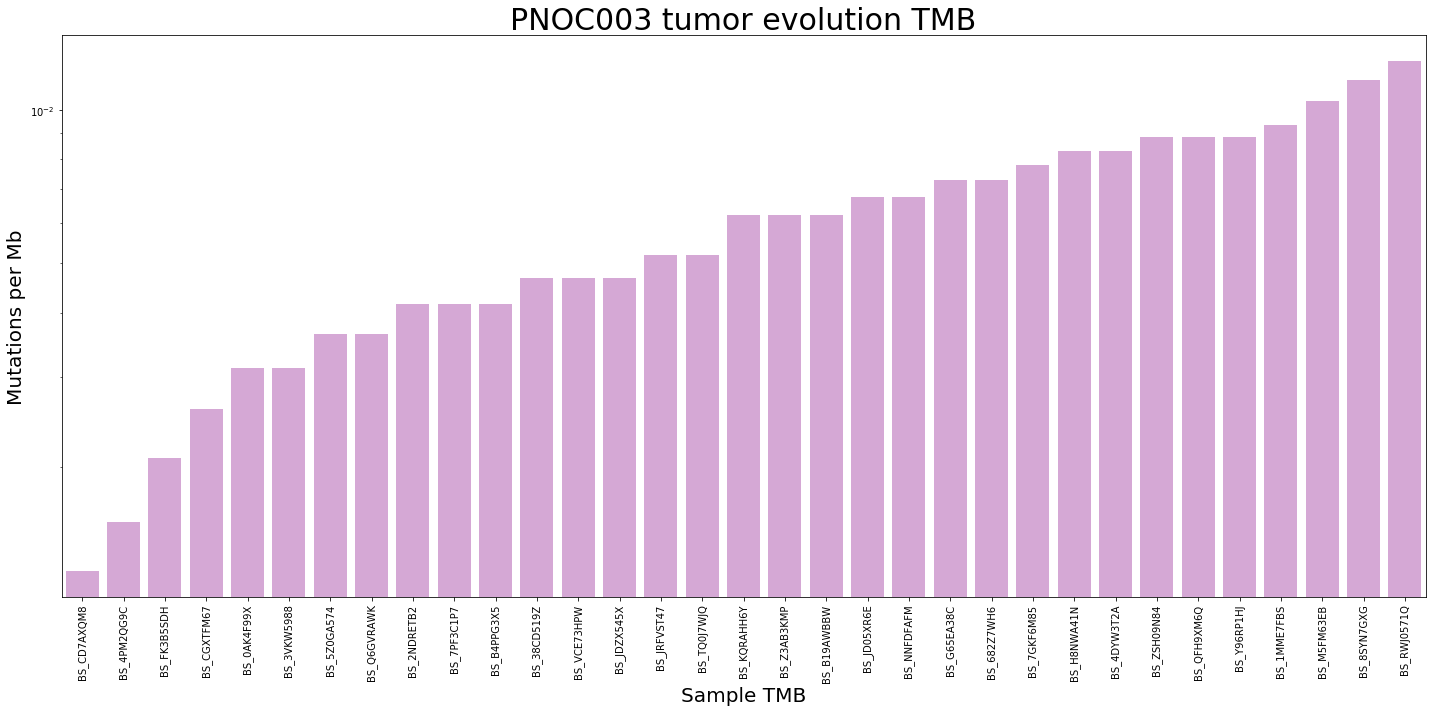

In [95]:
#barplots for cohort1 
cohort1 = pd.read_csv("TMB_outfiles/cohort1_TMB.txt", sep="\t")
cohort1 = cohort1.sort_values(by=['TMB'])
value_to_add = np.min(cohort1[cohort1["TMB"] != 0]["TMB"])*0.8
cohort1["new_TMB"] = cohort1["TMB"].replace({0: value_to_add})
cohort1 = cohort1.sort_values(by=['new_TMB'])

plt.figure(figsize=(20, 10))
ax = sns.barplot(
    x="Samplename",
    y="new_TMB",
    data=cohort1,
    color= "plum",
    dodge=False)

#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale("log")
plt.xticks(fontsize=10, rotation=90)
ax.set_xlabel("Sample TMB", fontsize=20)  # xlabel
ax.set_ylabel("Mutations per Mb", fontsize=20)  

plt.title('PNOC003 tumor evolution TMB',fontsize=30)
plt.tight_layout()
plt.savefig("plots/PNOC003_cohort1_TMB.png")

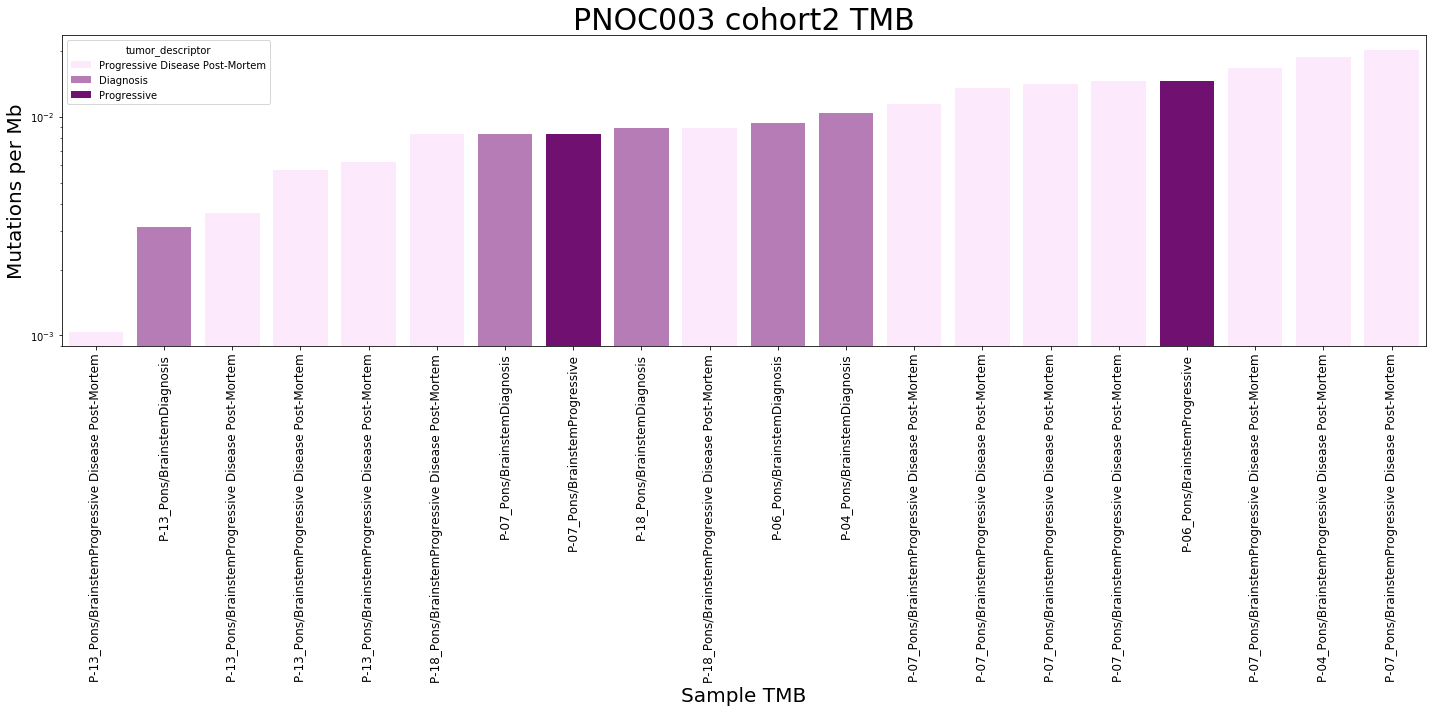

In [59]:
#barplots for cohort2

# histology for cohort2 with tumor_descriptor 
hist_tumor_evolution = pd.read_csv("histologies/histologyfile_pnoc003_tumor_evolution_cohort.txt", sep="\t")

cohort2 = pd.read_csv("TMB_outfiles/cohort2_TMB.txt", sep="\t")

# Getting external_id and primary_site from histology file
cohort2_with_hist = hist_tumor_evolution.merge(cohort2, left_on='Kids_First_Biospecimen_ID',
                           right_on='Samplename')[["Samplename", "TMB", "tumor_descriptor", "external_id", "primary_site"]]
cohort2_with_hist = cohort2_with_hist.sort_values(by=['TMB'])

plt.figure(figsize=(20, 10))
ax = sns.barplot(
    x="Samplename",
    y="TMB",
    data=cohort2_with_hist,
    color="purple",
    hue="tumor_descriptor",
    dodge=False)
plt.yscale("log")
plt.xticks(fontsize=10, rotation=90)
ax.set_xlabel("Sample TMB", fontsize=20)  # xlabel
ax.set_ylabel(
    "Mutations per Mb", fontsize=20
)  

ax.set_xticklabels(np.array(cohort2_with_hist["external_id"]+"_"+cohort2_with_hist[
    "primary_site"] + cohort2_with_hist["tumor_descriptor"]), fontsize=12)

plt.title('PNOC003 cohort2 TMB',fontsize=30)
plt.tight_layout()
plt.savefig("plots/PNOC003_cohort2_TMB.png")


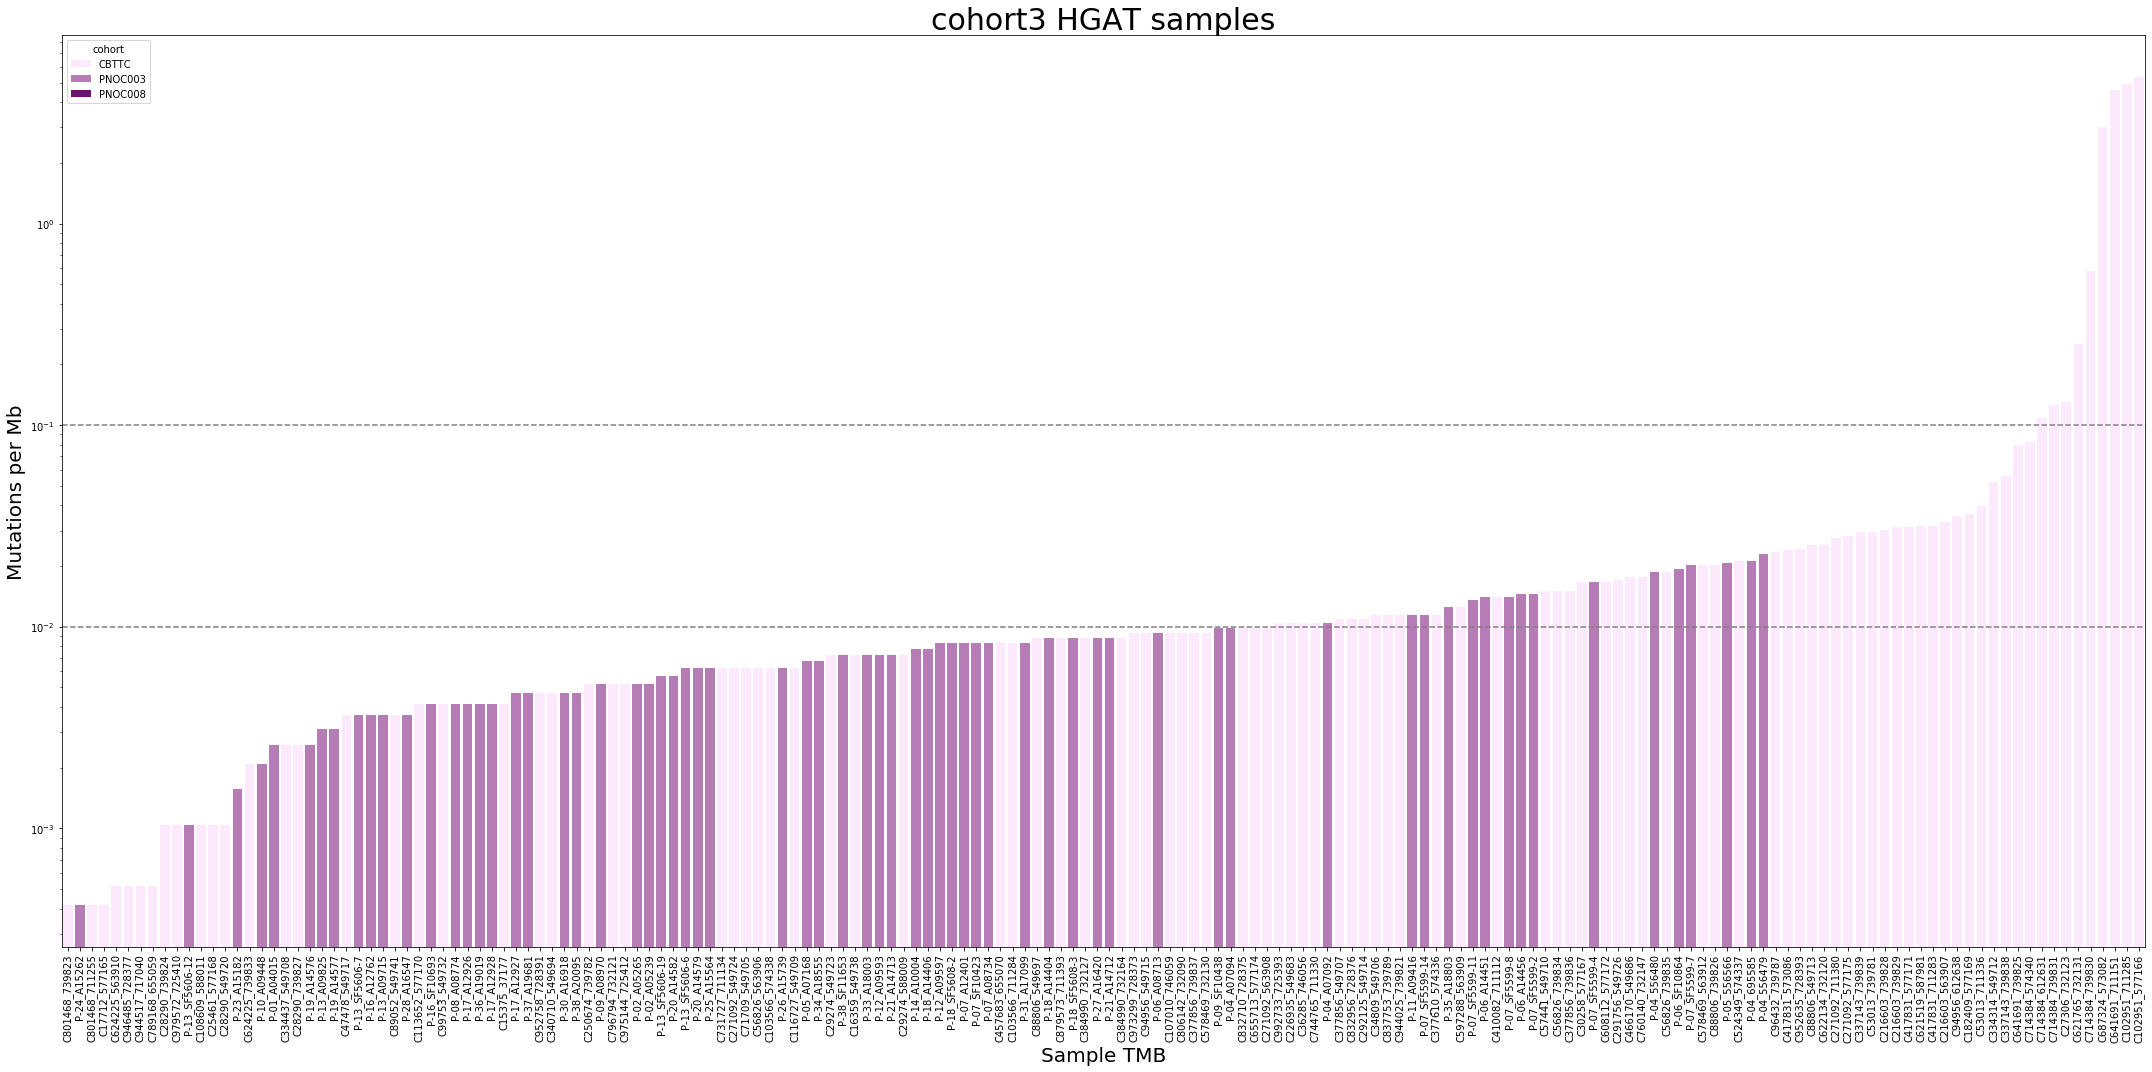

In [93]:
# cohort3 plots 
cohort3 = pd.read_csv("TMB_outfiles/cohort3_TMB.txt", sep="\t")
#Histology file
allsamples_histology = pd.read_csv("histologies/pnoc003_and_pnoc008_and_cbttc_v17_candidate.tsv", sep="\t")
allsamples_histology = allsamples_histology.rename(columns={'kids_first_biospecimen_id': 'Samplename'})



## Adding cohort column to TMB file 
cohort3 = pd.merge(cohort3, allsamples_histology, on='Samplename', how='inner')[[
    "Samplename", "TMB", "cohort_participant_id","aliquot_id", "cohort"]]
cohort3["unique_id"] = cohort3["cohort_participant_id"] +"_"+ cohort3["aliquot_id"]

## Replacing zero with a small value
value_to_add = np.min(cohort3[cohort3["TMB"] != 0]["TMB"])*0.8
cohort3["TMB_with_fractionadded"] = cohort3["TMB"].replace({0.000000: value_to_add})
cohort3 = cohort3.sort_values(by=['TMB_with_fractionadded'])


# plpotting barplots
plt.figure(figsize=(30, 15))
ax = sns.barplot(
    x="unique_id",
    y="TMB_with_fractionadded",
    data=cohort3,
    color= "purple",
    dodge=False,
    hue="cohort")

#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale("log")
plt.xticks(fontsize=10, rotation=90)
plt.axhline(y=0.01, color='gray', linestyle='--')
plt.axhline(y=0.1, color='gray', linestyle='--')
ax.set_xlabel("Sample TMB", fontsize=20)  # xlabel
ax.set_ylabel("Mutations per Mb", fontsize=20)  


plt.title('cohort3 HGAT samples',fontsize=30)
plt.tight_layout()
plt.savefig("plots/PNOC003_cohort3_TMB.png")

